In [1]:
library(tidyverse)
library(glue)

Warning message:
“package ‘tidyverse’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
Warning message:
“package ‘lubridate’ was built under R version 4.2.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package 

In [2]:
color_dict = c(
    "CellFlow"= "#B12F8C",
    "Optimal"= "#b8c88d"
    )

In [3]:
split_to_filter <- 5
dosage_to_filter <- "100\\.0$"
dosage_to_filter_str <- sub("\\\\.*", "", dosage_to_filter)

In [4]:
output_dir <- glue("/lustre/groups/ml01/workspace/ot_perturbation/figures/sciplex/benchmark/plots_recon_{dosage_to_filter_str}")

In [5]:
output_dir

/lustre/groups/ml01/workspace/ot_perturbation/figures/sciplex/benchmark/plots_recon_100

# Decoded

In [6]:
results_decoded <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/results/allocation/recon_cf_metrics_decoded.csv") 
results_decoded <- results_decoded %>%
  filter(grepl(dosage_to_filter, variable) & split == split_to_filter)



New names:
• `` -> `...1`
Rows: 166 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): model, metric, variable
dbl (4): ...1, value, split, dose

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


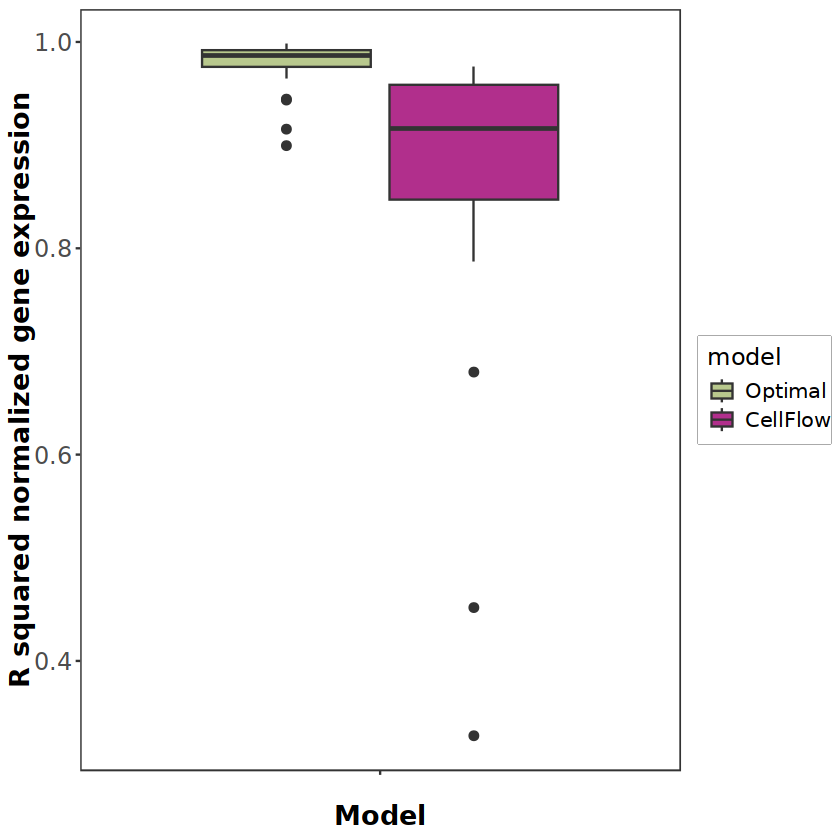

In [7]:
results_decoded$model <- factor(results_decoded$model, 
                            levels = c("recon", "otfm"),
                            labels = c("Optimal", "CellFlow"))  # Correct factorization

p <- ggplot(results_decoded, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y=glue("R squared normalized gene expression")) +
  scale_fill_manual(values=color_dict) +  # Removed labels argument
  scale_x_discrete(labels=c("")) +  # Keep this if you want no x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p

In [8]:
ggsave(file.path(output_dir, "ood_r_squared_decoded.pdf"), plot = p, device = "pdf")

Saving 7 x 7 in image


# Encoded

In [9]:
results_encoded <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/results/allocation/recon_cf_metrics_encoded.csv") 
results_encoded <- results_encoded %>%
  filter(grepl(dosage_to_filter, variable) & split == split_to_filter)


New names:
• `` -> `...1`
Rows: 664 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): model, metric, variable
dbl (4): ...1, value, split, dose

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


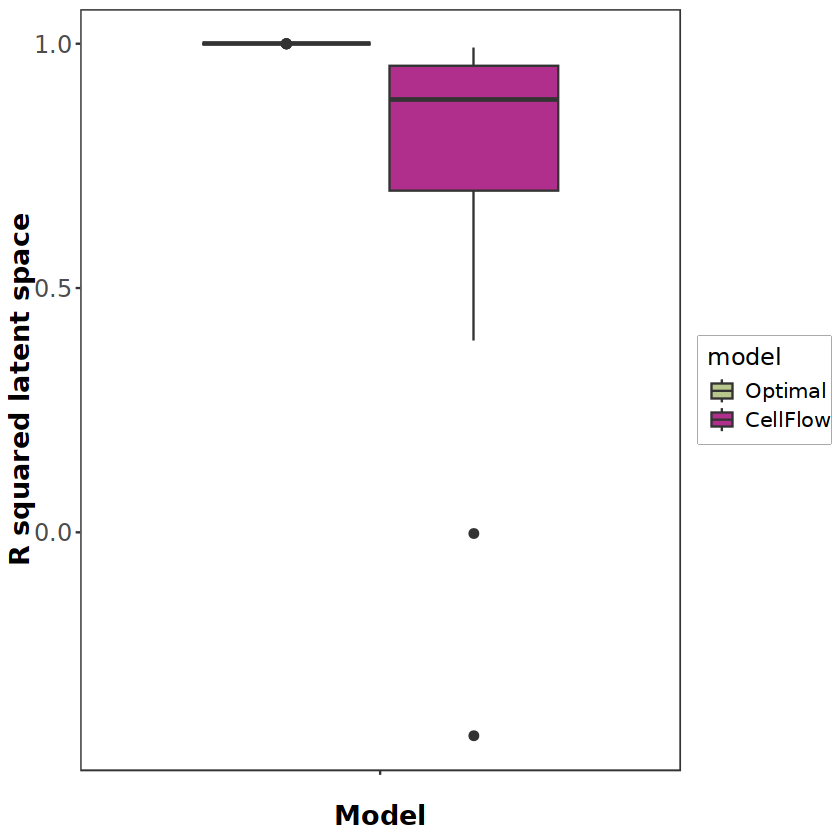

In [10]:
results <- results_encoded %>% filter(metric == "r_squared")

results$model <- factor(results$model, 
                                levels = c("recon", "otfm"),
                            labels = c("Optimal", "CellFlow"))  # Correct factorization

p <- ggplot(results, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="R squared latent space") +
  scale_fill_manual(values=color_dict) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )

p

In [11]:
ggsave(file.path(output_dir, "ood_r_squared_encoded.pdf"), plot = p, device = "pdf")

Saving 7 x 7 in image


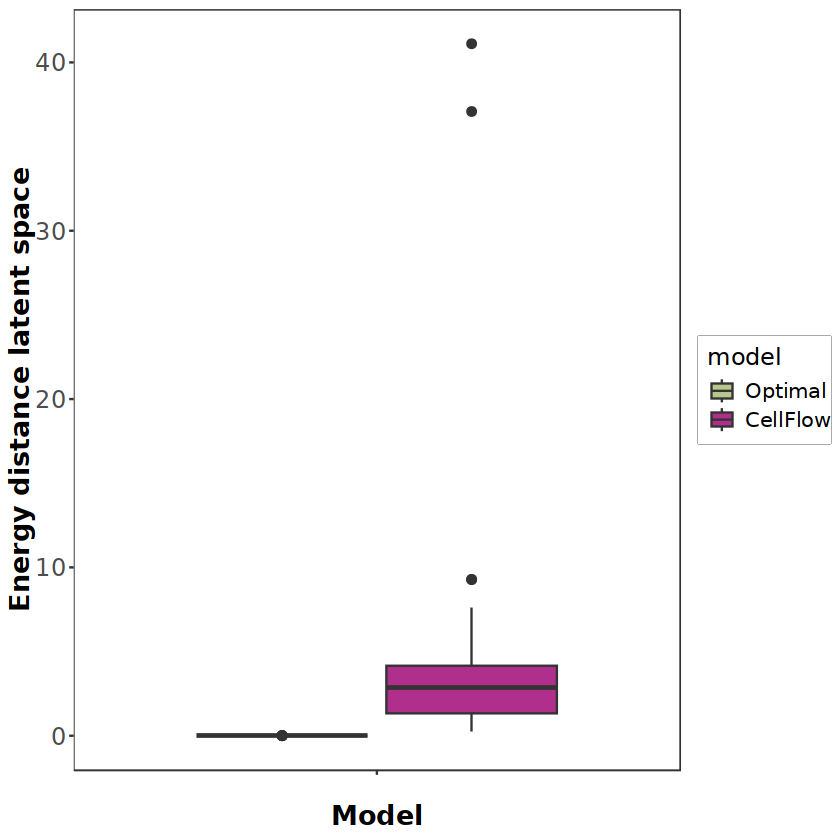

In [12]:
results <- results_encoded %>% filter(metric == "e_distance")

results$model <- factor(results$model, 
                                levels = c("recon", "otfm"),
                            labels = c("Optimal", "CellFlow"))  # Correct factorization

p <- ggplot(results, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="Energy distance latent space") +
  scale_fill_manual(values=color_dict) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p

In [13]:
ggsave(file.path(output_dir, "ood_e_distance_encoded.pdf"), plot = p, device = "pdf")

Saving 7 x 7 in image


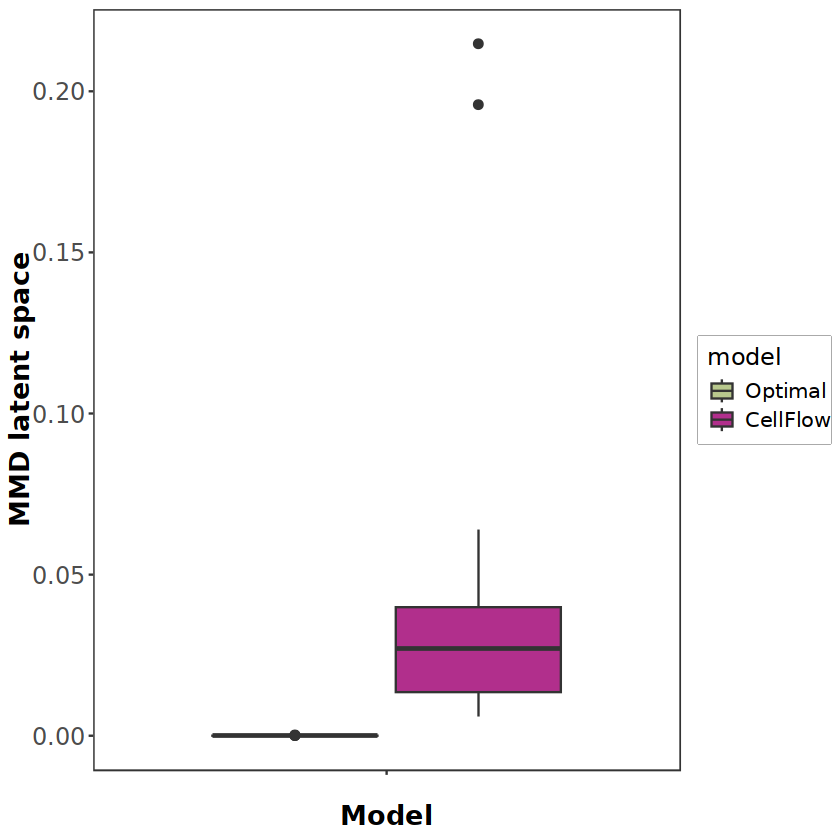

In [14]:
results <- results_encoded %>% filter(metric == "mmd")

results$model <- factor(results$model, 
                                levels = c("recon", "otfm"),
                            labels = c("Optimal", "CellFlow"))  # Correct factorization

p <- ggplot(results, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="MMD latent space") +
  scale_fill_manual(values=color_dict) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p

In [15]:
ggsave(file.path(output_dir, "ood_mmd_distance_encoded.pdf"), plot = p, device = "pdf")

Saving 7 x 7 in image


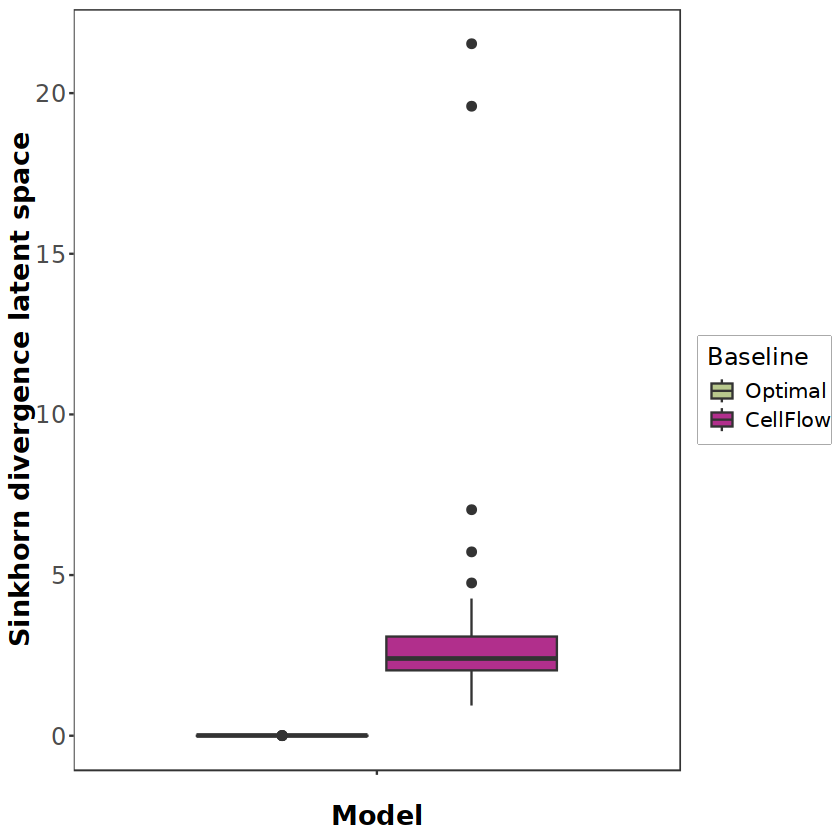

In [16]:
results <- results_encoded %>% filter(metric == "sinkhorn_div")

results$model <- factor(results$model, 
                                levels = c("recon", "otfm"),
                            labels = c("Optimal", "CellFlow"))  # Correct factorization

p <- ggplot(results, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="Sinkhorn divergence latent space") +
  scale_fill_manual(values=color_dict, c("Baseline", "CondOT", "Biolord", "CellFlow")) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p

In [17]:
ggsave(file.path(output_dir, "ood_sink_div_encoded.pdf"), plot = p, device = "pdf")

Saving 7 x 7 in image


# DEG

In [18]:
results_deg <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/results/allocation/recon_cf_metrics_deg.csv") 
results_deg <- results_deg %>%
  filter(grepl(dosage_to_filter, variable) & split == split_to_filter)


New names:
• `` -> `...1`
Rows: 664 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): model, metric, variable
dbl (4): ...1, value, split, dose

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


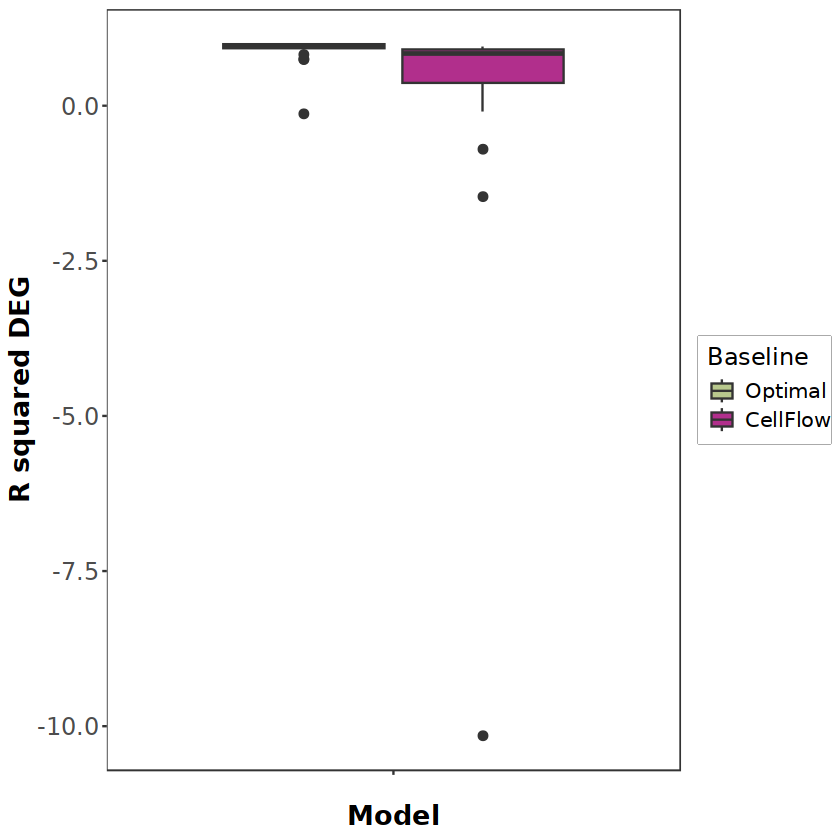

In [19]:
results <- results_deg %>% filter(metric == "r_squared")


results$model <- factor(results$model, 
                                levels = c("recon", "otfm"),
                            labels = c("Optimal", "CellFlow"))  # Correct factorization

p <- ggplot(results, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="R squared DEG") +
    scale_fill_manual(values=color_dict, c("Baseline", "CondOT", "Biolord", "CellFlow")) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p

In [20]:
ggsave(file.path(output_dir, "ood_r_squared_deg.pdf"), plot = p, device = "pdf")

Saving 7 x 7 in image


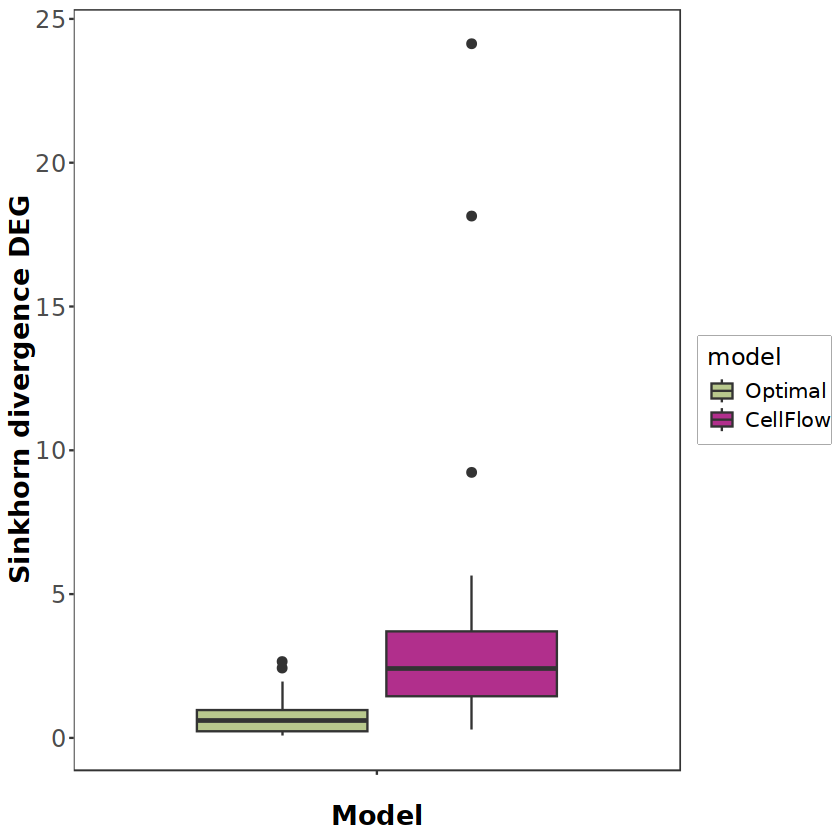

In [21]:
results <- results_deg %>% filter(metric == "sinkhorn_div")


results$model <- factor(results$model, 
                                levels = c("recon", "otfm"),
                            labels = c("Optimal", "CellFlow"))  # Correct factorization

p <- ggplot(results, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="Sinkhorn divergence DEG") +
    scale_fill_manual(values=color_dict) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p

In [22]:
ggsave(file.path(output_dir, "ood_sink_div_deg.pdf"), plot = p, device = "pdf")

Saving 7 x 7 in image


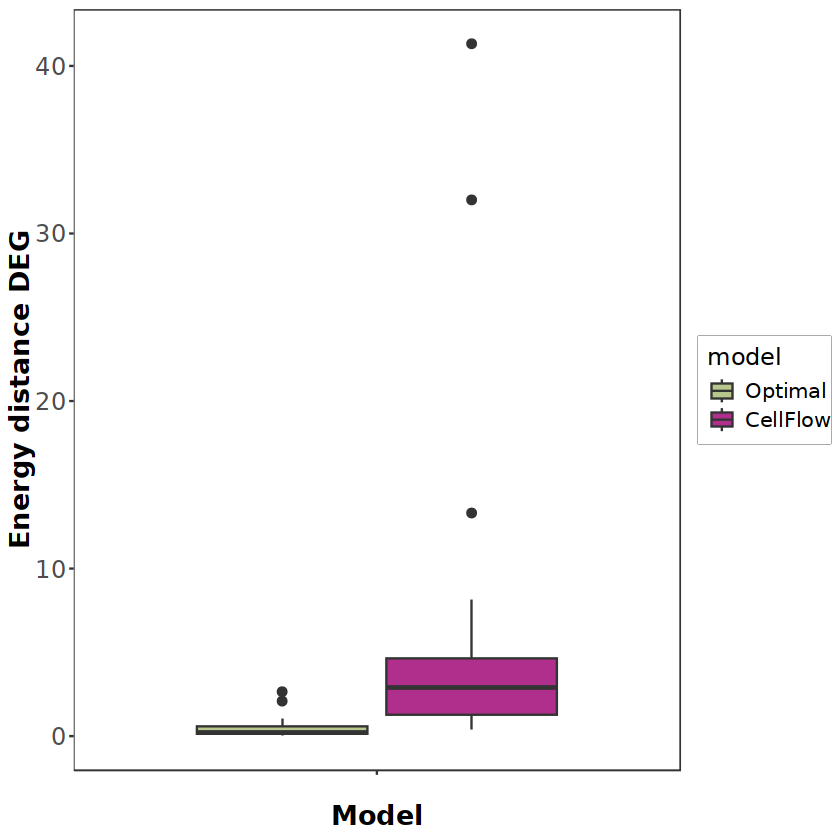

In [23]:
results <- results_deg %>% filter(metric == "e_distance")


results$model <- factor(results$model, 
                                levels = c("recon", "otfm"),
                            labels = c("Optimal", "CellFlow"))  # Correct factorization
p <- ggplot(results, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="Energy distance DEG") +
    scale_fill_manual(values=color_dict) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p

In [24]:
ggsave(file.path(output_dir, "ood_e_distance_deg.pdf"), plot = p, device = "pdf")

Saving 7 x 7 in image


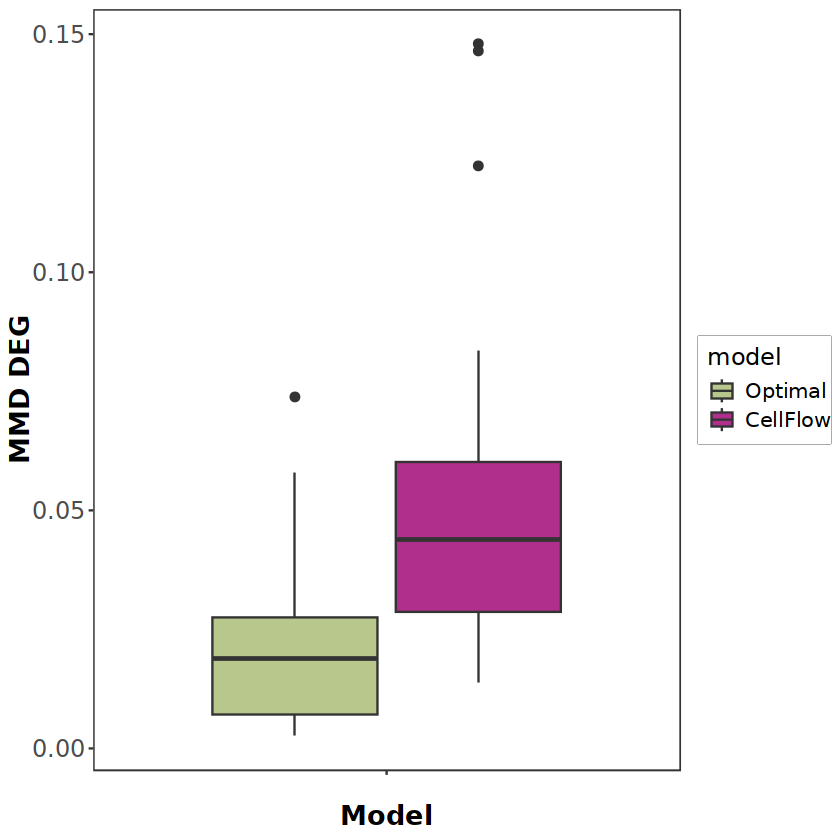

In [25]:
results <- results_deg %>% filter(metric == "mmd")


results$model <- factor(results$model, 
                                levels = c("recon", "otfm"),
                            labels = c("Optimal", "CellFlow"))  # Correct factorization

p <- ggplot(results, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="MMD DEG") +
    scale_fill_manual(values=color_dict) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p

In [26]:
ggsave(file.path(output_dir, "ood_mmd_deg.pdf"), plot = p, device = "pdf")

Saving 7 x 7 in image
